In [1]:
from lib import transient
from imp import reload
reload(transient)

import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

import pandas as pd



0.1
0.2
0.4
0.8
1.2
1.6
3.2
6.4
9.0
Imported 9 scan(s) as pump_power dependence


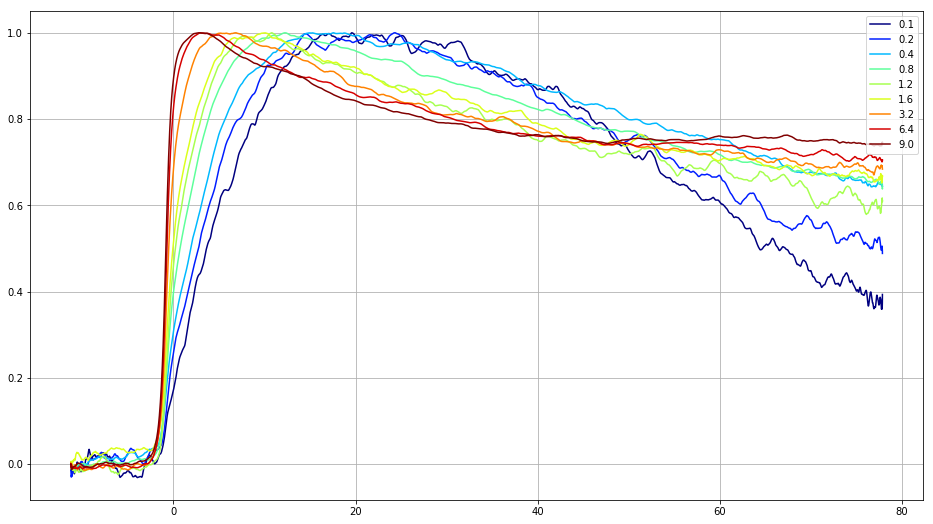

In [31]:
tr = transient.Transient()

filepath = 'E:/steinn/new data/2017-11-28/'
files = os.listdir(filepath)
ax = []
trs = []
k_parameters = []
cutFreq = 0.01 # THz
t0 = 76
key_parameter = 'pump_power'
description = ''
for i in range(len(files)):
    tr = transient.Transient()
    tr.import_file(filepath + files[i],cleanData=False, key_parameter = key_parameter, description=description)
#     print(tr.pump_power)
    tr.crop_time_scale()
    tr.shift_time(t0)
    tr.filter_low_pass(cutFreq)
#     tr.flip_trace()
    tr.remove_DC_offset()
    tr.flip_time()
    k_parameters.append(float(tr.pump_power))
    
    tr.trace = np.divide(tr.trace,max(tr.trace))
#     tr.trace = np.divide(tr.trace,tr.pump_power)

    trs.append(tr)
    
print('Imported {0} scan(s) as {1} dependence'.format(len(trs),trs[0].key_parameter))


fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
jet = cm = plt.get_cmap('jet') 
cNormLog = colors.LogNorm(vmin=min(k_parameters), vmax=max(k_parameters))
cNorm  = colors.Normalize(vmin=min(k_parameters), vmax=max(k_parameters))
scalarMap = cmx.ScalarMappable(norm=cNormLog, cmap=jet)
lines = []
for idx in range(len(trs)):
    colorVal = scalarMap.to_rgba(trs[idx].pump_power)
    retLine, = ax.plot(trs[idx].time, trs[idx].trace, color=colorVal)
    lines.append(retLine)
# make labels
    labels = []
for i in range(len(lines)):
    labels.append((lines[i],k_parameters[i]))
labels = sorted(labels, key=lambda kpar: float(kpar[1]))
lbLines=[]
lbVals=[]
for i in range(len(labels)):
    lbLines.append(labels[i][0])
    lbVals.append(labels[i][1])
ax.legend(lbLines, lbVals, loc='upper right')
# plt.xlim((-5,5))
# plt.ylim((-0.0002,0.0008))
ax.grid()


1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
Imported 38 scan(s) as pump_power dependence


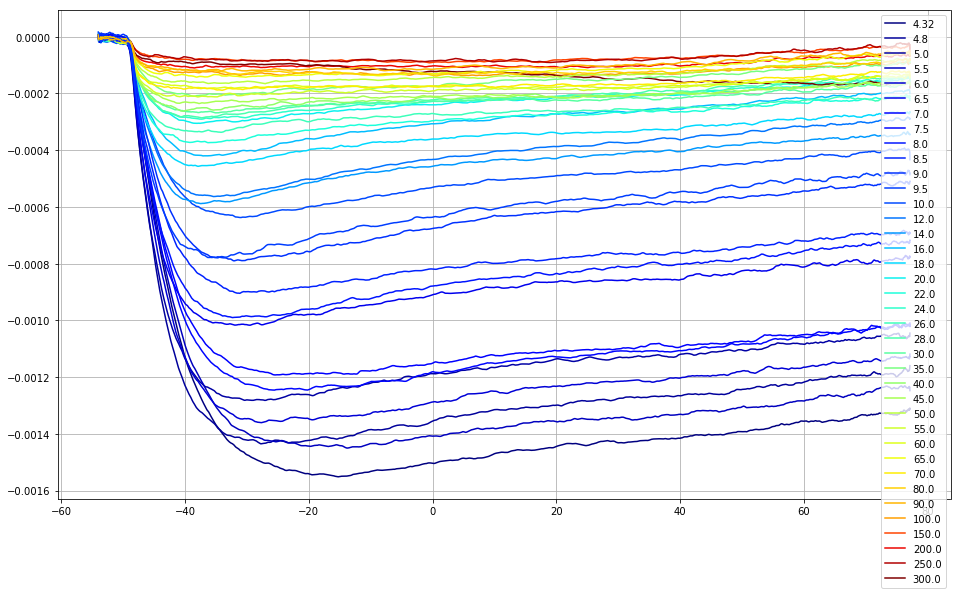

In [34]:
tr = transient.Transient()

filepath = 'E:/steinn/RuCl3/Low Fluence_temperature/'
files = os.listdir(filepath)
ax = []
trs = []
k_parameters = []
cutFreq = 0.01 # THz
t0 = 76
key_parameter = 'pump_power'
description = ''
for i in range(len(files)):
    tr = transient.Transient()
    tr.import_file(filepath + files[i],cleanData=False, key_parameter = key_parameter, description=description)
    print(tr.pump_power)
    tr.crop_time_scale()
    tr.shift_time(t0)
    tr.filter_low_pass(cutFreq)
#     tr.flip_trace()
    tr.remove_DC_offset()
    tr.flip_time()
    k_parameters.append(float(tr.temperature))
    
#     tr.trace = np.divide(tr.trace,max(tr.trace))
#     tr.trace = np.divide(tr.trace,tr.pump_power)

    trs.append(tr)
    
print('Imported {0} scan(s) as {1} dependence'.format(len(trs),trs[0].key_parameter))


fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
jet = cm = plt.get_cmap('jet') 
cNormLog = colors.LogNorm(vmin=min(k_parameters), vmax=max(k_parameters))
cNorm  = colors.Normalize(vmin=min(k_parameters), vmax=max(k_parameters))
scalarMap = cmx.ScalarMappable(norm=cNormLog, cmap=jet)
lines = []
for idx in range(len(trs)):
    colorVal = scalarMap.to_rgba(trs[idx].temperature)
    retLine, = ax.plot(trs[idx].time, trs[idx].trace, color=colorVal)
    lines.append(retLine)
# make labels
    labels = []
for i in range(len(lines)):
    labels.append((lines[i],k_parameters[i]))
labels = sorted(labels, key=lambda kpar: float(kpar[1]))
lbLines=[]
lbVals=[]
for i in range(len(labels)):
    lbLines.append(labels[i][0])
    lbVals.append(labels[i][1])
ax.legend(lbLines, lbVals, loc='upper right')
# plt.xlim((-5,5))
# plt.ylim((-0.0002,0.0008))
ax.grid()




In [36]:
trs[1].pump_energy


0.143

In [26]:
tr.filter_low_pass(cutHigh=0.05)

0.014
0.108
0.028
0.108
0.056
0.108
0.112
0.108
0.169
0.108
0.225
0.108
0.45
0.108
0.9
0.108
1.265
0.108
Imported 9 scan(s) as pump_power dependence


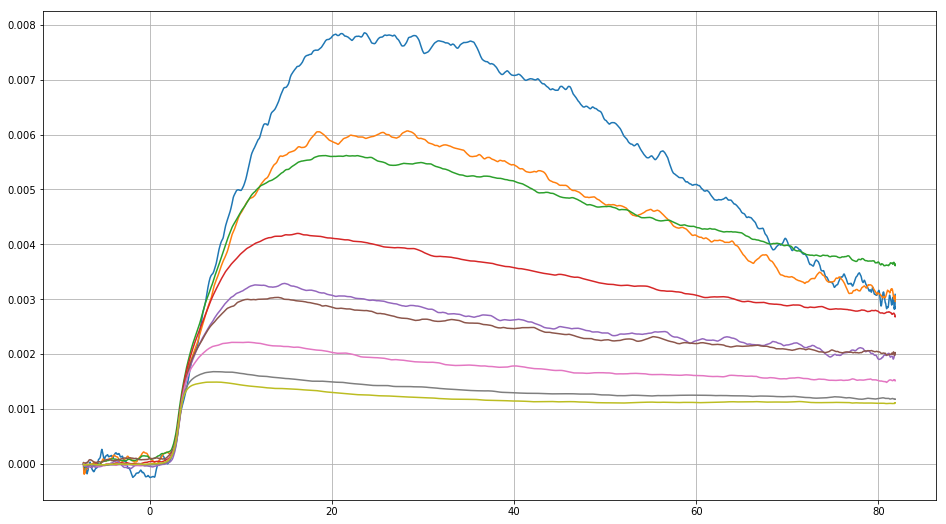

In [3]:
filepath = 'E:/steinn/new data/2017-11-28/'
files = os.listdir(filepath)
pump_spot = 80
probe_spot = 50
cutFreq = 0.01 # THz
t0 = 80
key_parameter = 'pump_power'
description = ''

###########################
# init lsits:
scanList = []
k_parameters = []

for i in range(len(files)):
    tr = transient.Transient()
    tr.import_file(filepath + files[i],cleanData=False, key_parameter = key_parameter, description=description)
    tr.pump_spot = pump_spot
    tr.probe_spot = probe_spot
    tr.calc_energy_densities()
    tr.crop_time_scale()
    tr.shift_time(t0)
    tr.filter_low_pass(cutFreq)
#     tr.flip_trace()
    tr.remove_DC_offset()
    tr.flip_time()
    k_parameters.append(float(getattr(tr,key_parameter)))
    tr.trace = np.divide(tr.trace,tr.pump_energy)
    scanList.append(tr)    
print('Imported {0} scan(s) as {1} dependence'.format(len(scanList),scanList[0].key_parameter))
data1 = scanList
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
for idx in range(len(scanList)):
    ax.plot(scanList[idx].time, scanList[idx].trace)
# plt.xlim((-2,5))
# plt.ylim((-0.0003,0.002))
plt.grid()

In [74]:
data3 = data1[:4]
for i in data2:
    data3.append(i)
list(data3)

In [44]:
dataFrame = {}
key_parameter = 'pump_energy'
for tr in scanList:
    # tr.calc_energy_densities()
    name = str(getattr(tr,key_parameter)) + ' ' + str(tr.get_unit(key_parameter))
    dataFrame[name] = tr.trace
dataFrame = pd.DataFrame(dataFrame, index = scanList[0].time)
#     dataFrame[] = tr.trace
#     tr.trace = np.divide(tr.trace,max(tr.trace))
#     tr.trace = np.divide(tr.trace,tr.pump_power)


# fig = plt.figure(figsize=(16,9))
# ax = fig.add_subplot(111)
# jet = cm = plt.get_cmap('jet') 
# cNormLog = colors.LogNorm(vmin=min(k_parameters), vmax=max(k_parameters))
# cNorm  = colors.Normalize(vmin=min(k_parameters), vmax=max(k_parameters))
# scalarMap = cmx.ScalarMappable(norm=cNormLog, cmap=jet)
# lines = []
# for idx in range(len(trs)):
#     colorVal = scalarMap.to_rgba(trs[idx].temperature)
#     retLine, = ax.plot(trs[idx].time, trs[idx].trace, color=colorVal)
#     lines.append(retLine)
# # make labels
#     labels = []
# for i in range(len(lines)):
#     labels.append((lines[i],k_parameters[i]))
# labels = sorted(labels, key=lambda kpar: float(kpar[1]))
# lbLines=[]
# lbVals=[]
# for i in range(len(labels)):
#     lbLines.append(labels[i][0])
#     lbVals.append(labels[i][1])
# ax.legend(lbLines, lbVals, loc='upper right')
# # plt.xlim((-5,5))
# # plt.ylim((-0.0002,0.0008))
# ax.grid()




ValueError: could not broadcast input array from shape (6330) into shape (6329)

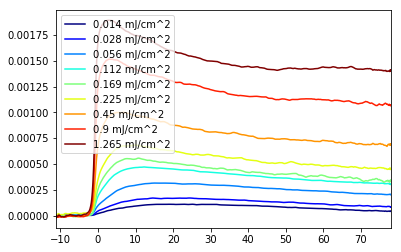

In [39]:
dataFrame[].plot(colormap='jet',)

In [69]:
def plotScanList(data,key_parameter,
                 xlim=(0,0),ylim=(0,0),
                 norm=None, 
                 save = True,
                 saveDir='e:/Steinn/Data/RuCl3/figs/', 
                 title=None):
    kParList = []
    for scan in data:
        kParList.append(getattr(scan,key_parameter))
        if norm is not None:
            if norm == 'peak':
                scan.trace = np.divide(scan.trace,max(scan.trace))
            else:
                scan.trace = np.divide(scan.trace,getattr(scan,norm))

            

    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111)
    jet = cm = plt.get_cmap('jet') 
    cNormLog = colors.LogNorm(vmin=min(kParList), vmax=max(kParList))
    cNorm  = colors.Normalize(vmin=min(kParList), vmax=max(kParList))
    scalarMap = cmx.ScalarMappable(norm=cNormLog, cmap=jet)
    lines = []
    for scan in data:
        colorVal = scalarMap.to_rgba(getattr(scan,key_parameter))
        retLine, = ax.plot(scan.time, scan.trace, color=colorVal)
        lines.append(retLine)
    # make labels
        labels = []
    for i in range(len(lines)):
        labels.append((lines[i],kParList[i]))
    labels = sorted(labels, key=lambda kpar: float(kpar[1]))
    lbLines=[]
    lbVals=[]
    for i in range(len(labels)):
        lbLines.append(labels[i][0])
        lbVals.append(labels[i][1])
    ax.legend(lbLines, lbVals, loc='upper right')
    if xlim == (0,0):
        pass
    else:
        plt.xlim(xlim)
    if ylim == (0,0):
        pass
    else:
        plt.ylim(ylim)
    
    ax.grid()
    plt.title(title)
    plt.ylabel = 'dr/r'
    if norm is not None:
        plt.ylabel = 'dr/r [norm to {}]'.format(norm)
    plt.xlabel = 'Time [ps]'
    if save:
        if not os.path.isdir(saveDir):
            os.makedirs(saveDir)
        plt.savefig(saveDir+title)

0.028
0.108
0.028
0.108
Imported 2 scan(s) as pump_power dependence


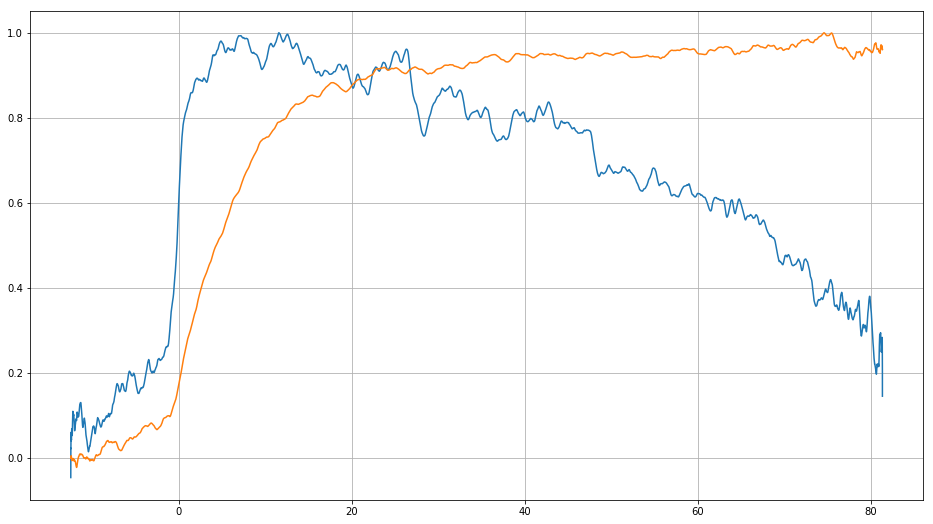

In [80]:
filepath = 'E:/steinn/new data/asdf2/'
files = os.listdir(filepath)
pump_spot = 80
probe_spot = 50
cutFreq = 0.01 # THz
t0 = 80
key_parameter = 'pump_power'
description = ''

###########################
# init lsits:
scanList = []
k_parameters = []

for i in range(len(files)):
    tr = transient.Transient()
    tr.import_file(filepath + files[i],cleanData=False, key_parameter = key_parameter, description=description)
    tr.pump_spot = pump_spot
    tr.probe_spot = probe_spot
    tr.calc_energy_densities()
    tr.crop_time_scale()
    tr.shift_time(t0)
    tr.filter_low_pass(cutFreq)
#     tr.flip_trace()
    tr.remove_DC_offset()
    tr.flip_time()
    k_parameters.append(float(getattr(tr,key_parameter)))
    tr.trace = np.divide(tr.trace,max(tr.trace))
    scanList.append(tr)    
print('Imported {0} scan(s) as {1} dependence'.format(len(scanList),scanList[0].key_parameter))
data1 = scanList
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
for idx in range(len(scanList)):
    ax.plot(scanList[idx].time, scanList[idx].trace)
# plt.xlim((-2,5))
# plt.ylim((-0.0003,0.002))
plt.grid()

# Export data from first power depedence:

0.014
0.108
0.014
0.108
0.014
0.108
0.014
0.108
0.014
0.108
0.014
0.108
0.014
0.108
Imported 7 scan(s) as pump_power dependence


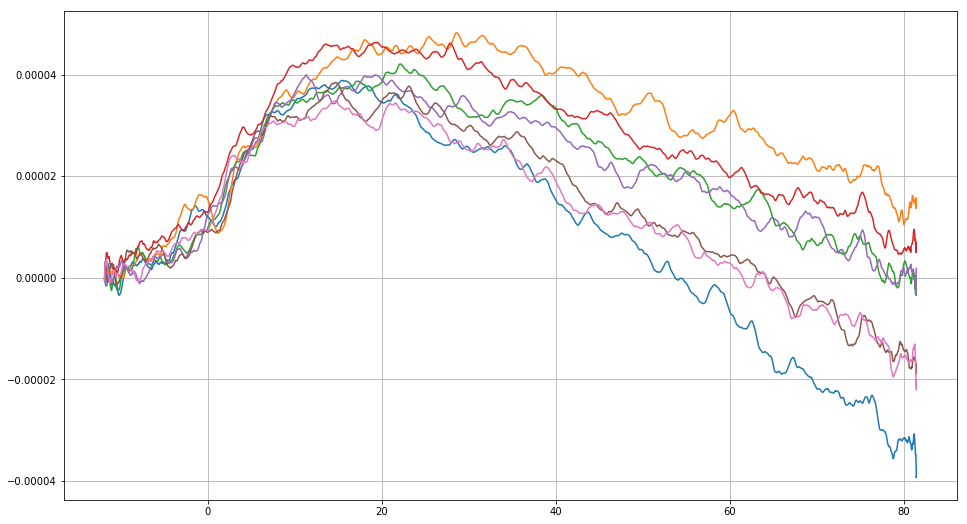

In [101]:
filepath = 'E:/steinn/RuCl3/temperature dependence/p0,1mW/'
files = os.listdir(filepath)
pump_spot = 80
probe_spot = 50
cutFreq = 0.01 # THz
t0 = 80.5
key_parameter = 'pump_power'
description = ''

###########################
# init lsits:
scanList = []
k_parameters = []

for i in range(len(files)):
    tr = transient.Transient()
    tr.import_file(filepath + files[i],cleanData=False, key_parameter = key_parameter, description=description)
    tr.pump_spot = pump_spot
    tr.probe_spot = probe_spot
    tr.calc_energy_densities()
    tr.crop_time_scale()
    tr.shift_time(t0)
    tr.filter_low_pass(cutFreq)
#     tr.flip_trace()
    tr.remove_DC_offset()
    tr.flip_time()
    k_parameters.append(float(getattr(tr,key_parameter)))
    tr.temperature = 3.8
    tr.description = str(tr.temperature) + 'K'
    tr.give_name()
#     tr.trace = np.divide(tr.trace,tr.pump_energy)
    scanList.append(tr)    
print('Imported {0} scan(s) as {1} dependence'.format(len(scanList),scanList[0].key_parameter))
data1 = scanList
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
for idx in range(len(scanList)):
    ax.plot(scanList[idx].time, scanList[idx].trace)
# plt.xlim((-4,8))
# plt.ylim((-0.0003,0.006))
plt.grid()

In [30]:

csvDir = 'e:/Steinn/Data/RuCl3/'
if not os.path.isdir(csvDir):
    os.makedirs(csvDir)
for scan in scanList:
    scan.export_file_csv(csvDir)

Exporting Ru3Cl_3.8K_0.1_mW
Exporting Ru3Cl_3.8K_0.1_mW


In [59]:
csvScanList = []
for csv in os.listdir(csvDir):
    filePath = csvDir + csv
    if not os.path.isdir(filePath):
        tr = transient.Transient()
        tr.import_file(filePath,cleanData=False)
#         tr.filter_low_pass(cutHigh=0.01)
        csvScanList.append(tr)
    
    

In [90]:
for scan in data1:
    print(scan.pump_energy)

0.007
0.014
0.028
0.056
0.112
0.225
1.645
0.45
0.9


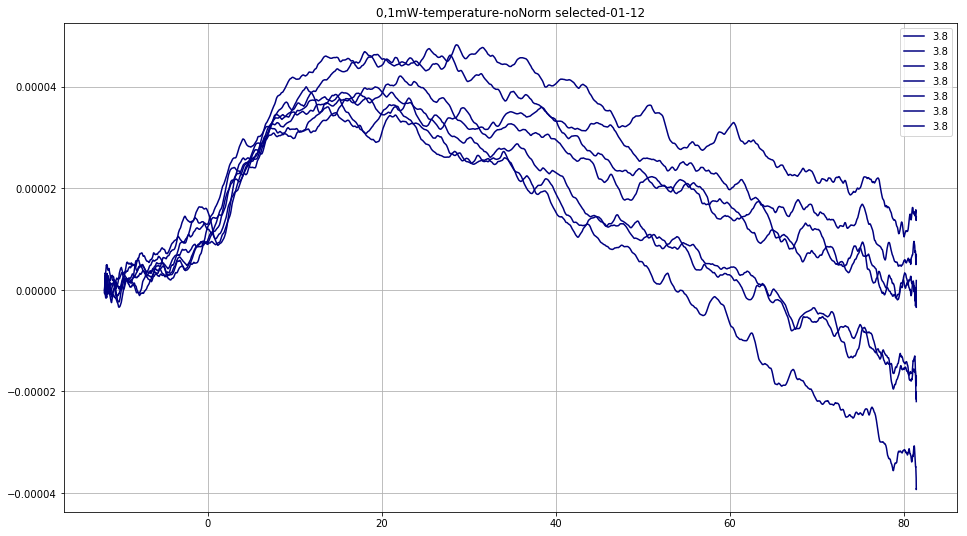

In [102]:
title = '0,1mW-temperature-noNorm selected-01-12'
plotScanList(data1,'temperature',norm=None,title=title, save=True)